<a href="https://colab.research.google.com/github/BhanuSandeepVellalacheruvu/PREDICITON-OF-ENERGY-CONSUMPTION-AND-ANALYSIS-IN-EV-S/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INSTALLING LIBRARIES AND IMPORTING THEM**

In [ ]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn scikit-learn

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv('/content/sample_data/ev_dataset_4.csv')  # Replace 'your_dataset.csv' with the path to your dataset file


## **1.Data Cleaning:**

*   Check for missing values and handle them by filling them with mean, median, or mode.

*   Handle outliers if present.




In [ ]:
print("Dataset columns:")
print(data.columns)


Dataset columns:
Index(['trip_speed_kmh', 'trip_distance_km', 'usage_heater_ac',
       'ambient_temperature_c', 'road_gradient_pct', 'driving_conditions',
       'battery_efficiency', 'vehicle_weight_kg', 'charging_frequency',
       'driving_behavior', 'battery_type', 'energy_consumption'],
      dtype='object')


In [ ]:
numerical_features = ['trip_speed_kmh', 'trip_distance_km', 'ambient_temperature_c', 'road_gradient_pct',
                      'battery_efficiency', 'vehicle_weight_kg', 'charging_frequency', 'driving_behavior']


In [ ]:
imputer = SimpleImputer(strategy='mean')
data[numerical_features] = imputer.fit_transform(data[numerical_features])


In [ ]:
z_scores = np.abs((data[numerical_features] - data[numerical_features].mean()) / data[numerical_features].std())
outliers = (z_scores > 3).any(axis=1)
data = data[~outliers]


## **2.Data Transformation:**

*   Normalize or standardize continuous features.
*   Convert categorical features using one-hot encoding or label encoding





In [ ]:
# Define features
numerical_features = ['trip_speed_kmh', 'trip_distance_km', 'ambient_temperature_c', 'road_gradient_pct',
                      'battery_efficiency', 'vehicle_weight_kg', 'charging_frequency', 'driving_behavior']
categorical_features = ['driving_conditions', 'battery_type']

# Define column transformer for preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),  # Normalize continuous features
    ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical features
])

# Apply preprocessing
data_transformed = preprocessor.fit_transform(data)


## **3.Data Splitting:**


*   Split the data into training, validation, and testing sets.




In [ ]:
# Define target variable and features
target = data['energy_consumption']  # Replace 'energy_consumption' with the actual target column name
features = data.drop(columns=['energy_consumption'])  # Exclude target variable from features

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 547
Validation set size: 117
Testing set size: 118


## **4.Visualization:**


*   Visualize data using heatmaps and bar plots




In [ ]:
# Convert categorical features to numerical data using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['driving_conditions', 'battery_type'])


In [ ]:
# Calculate the correlation matrix
corr_matrix = data_encoded.corr()


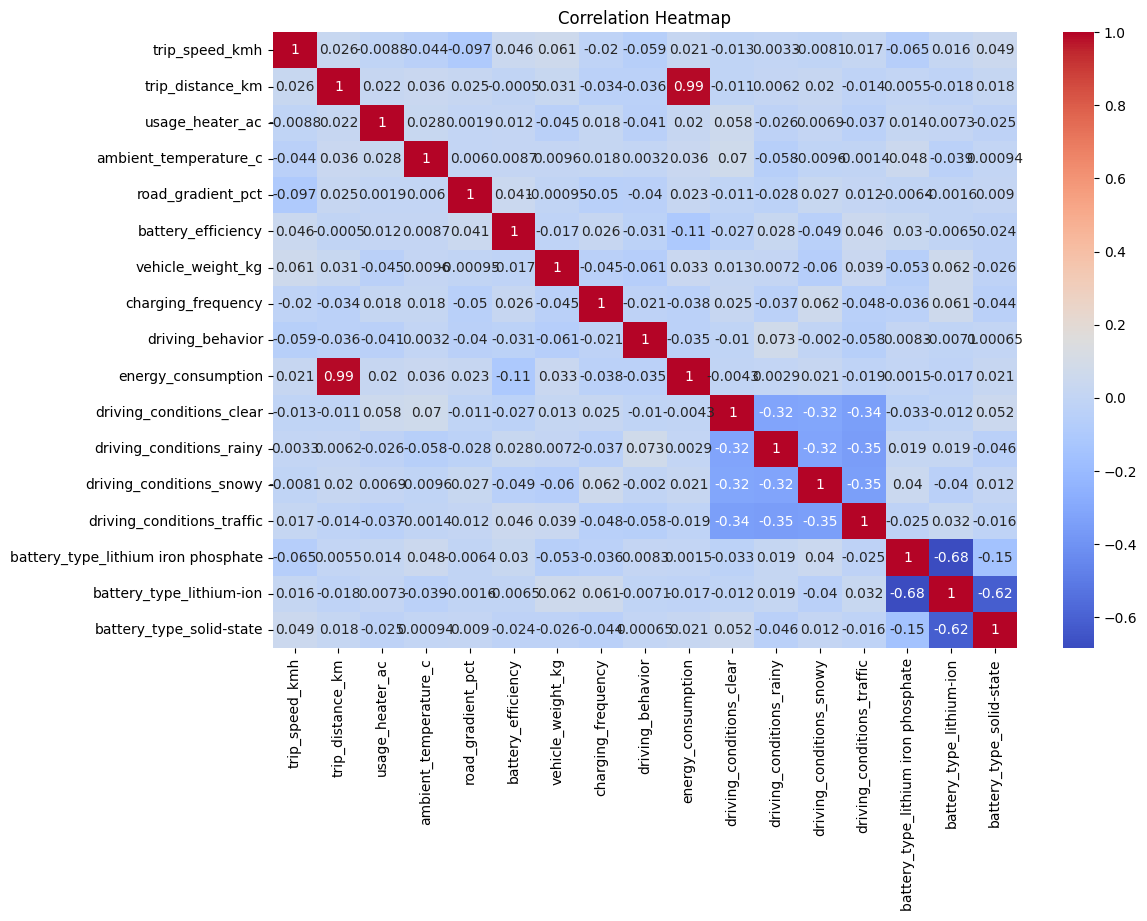

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


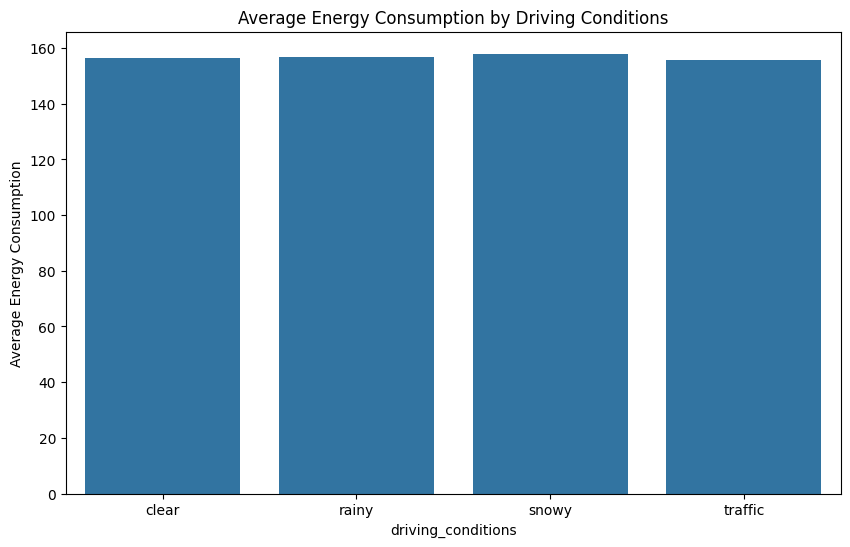

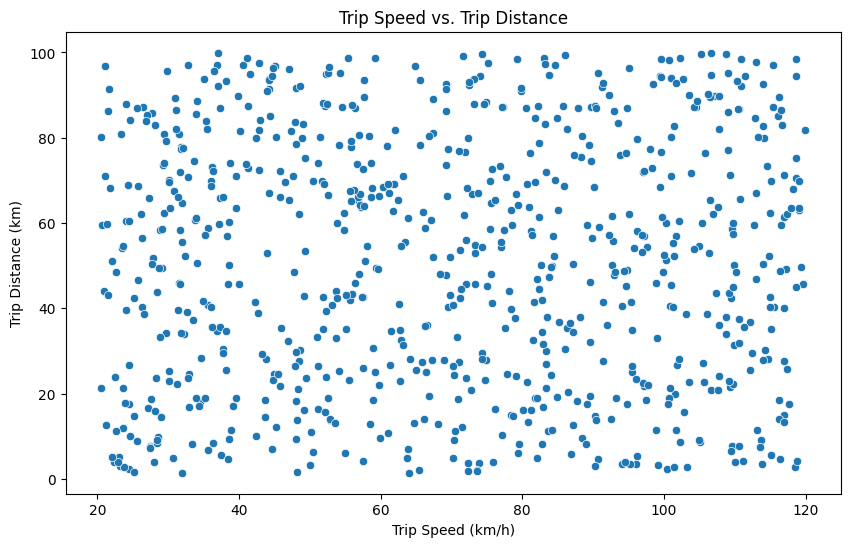

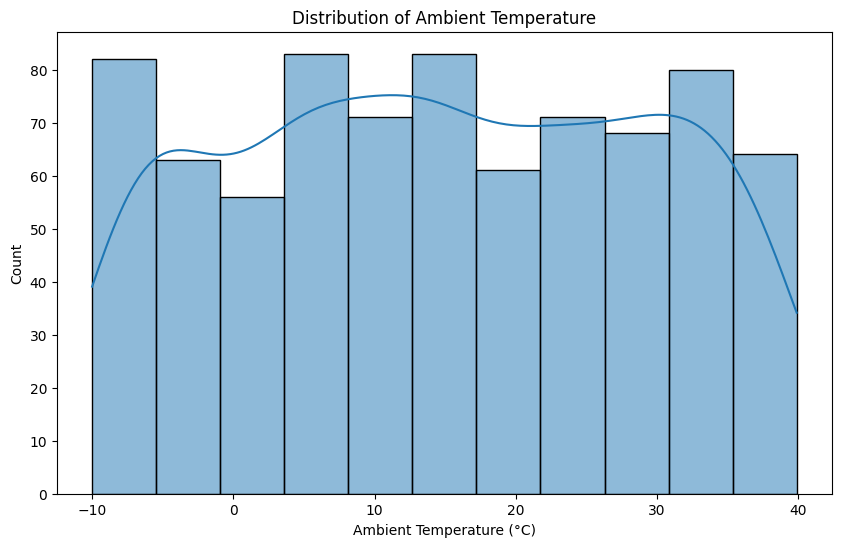

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing bar plots for categorical features
def visualize_bar_plots(data, target):
    # Average energy consumption by driving conditions
    avg_by_driving_conditions = data.groupby('driving_conditions')[target].mean()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=avg_by_driving_conditions.index, y=avg_by_driving_conditions)
    plt.title('Average Energy Consumption by Driving Conditions')
    plt.ylabel('Average Energy Consumption')
    plt.show()

    # Average energy consumption by battery type

# Call the visualization functions
# Assuming your data is stored in the variable `data` and target variable is `energy_consumption`
visualize_bar_plots(data, 'energy_consumption')
visualize_scatter_plots(data)
visualize_histograms(data)


# **Model Selection and Training:**


In the **Model Selection and Training** process, you aim to compare the performance of different machine learning algorithms using a training set and a validation set. Here's a brief overview of the steps involved:

1. **Model Selection**:
    - Choose various machine learning algorithms to compare, such as Linear Regression, Decision Trees, Random Forests, Gradient Boosting, Neural Networks, and Support Vector Machines (SVM).
    - Each model has its own strengths and weaknesses, making it suitable for different types of data and tasks.

2. **Training**:
    - Train each selected model using the training set. This involves teaching the model how to make predictions based on the input features and the target variable.
    - Adjust the model's parameters to minimize prediction errors and improve performance.

3. **Hyperparameter Tuning**:
    - Use the validation set to tune hyperparameters for each model.
    - Hyperparameters are settings such as learning rate, regularization, and depth of trees that control how the model learns and performs.
    - Fine-tuning hyperparameters helps improve model performance and generalization.

4. **Comparison and Selection**:
    - Compare the performance of each model on the validation set using evaluation metrics (e.g., accuracy, mean squared error).
    - Select the model that provides the best performance for your specific use case.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor


## **1.Linear Regression**
> Linear Regression is a simple and interpretable model that assumes a linear relationship between features and energy consumption. It's an excellent baseline model to start with, providing insights into the relationship between input features and the target variable. However, it may not perform well with complex, non-linear relationships.



In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the categorical features in your dataset
categorical_features = ['driving_conditions', 'battery_type']

# Create a column transformer that one-hot encodes the categorical features
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the column transformer to the training and testing data
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

# Train the linear regression model
print("Linear Regression:")
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_transformed, y_train)
y_pred_lr = evaluate_model(linear_regression_model, X_test_transformed, y_test)
print()  # Blank line for separation


Linear Regression:
Mean Absolute Error (MAE): 1.6912558689978572
Mean Squared Error (MSE): 5.004245967448969
Root Mean Squared Error (RMSE): 2.2370172032080955
R-squared (R²): 0.9953104693634977



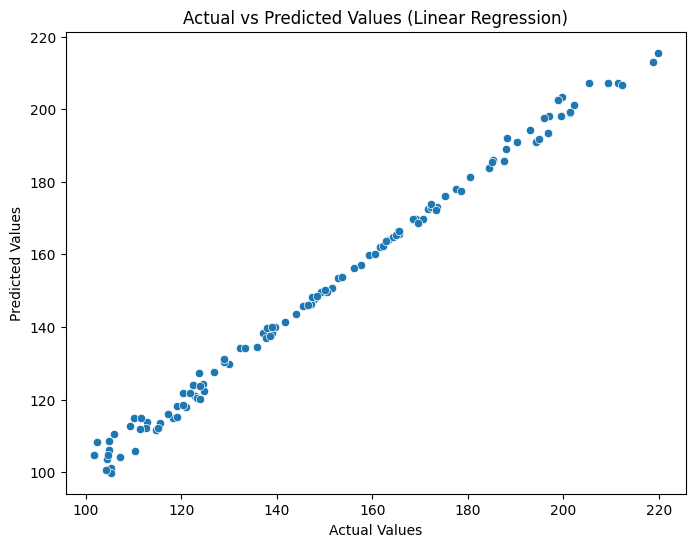

In [ ]:
# Scatter plot comparing actual and predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Line plot showing actual and predicted values over time (sorted)


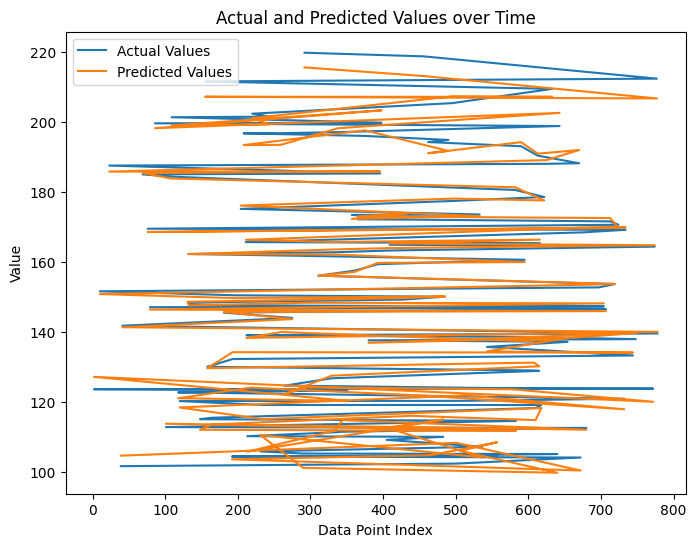

In [ ]:
# Create a DataFrame from y_test and y_pred_lr
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_lr
})

# Sort the DataFrame by the 'Actual' column
comparison_df_sorted = comparison_df.sort_values(by='Actual')

# Plot the sorted values
plt.figure(figsize=(8, 6))
plt.plot(comparison_df_sorted['Actual'], label='Actual Values')
plt.plot(comparison_df_sorted['Predicted'], label='Predicted Values')
plt.title('Actual and Predicted Values over Time')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
# Assuming you have a trained model, e.g., linear_regression_model
y_pred = linear_regression_model.predict(X_test_transformed)

# Define a threshold for converting continuous predictions to binary classes
threshold = 0.5  # You can adjust this threshold as per your requirements

# Convert continuous predictions to binary classes
# For example, predictions above the threshold are classified as 1, and below as 0
y_pred_classes = (y_pred > threshold).astype(int)
y_test_classes = (y_test > threshold).astype(int)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_classes, y_pred_classes)

print(f"Accuracy: {accuracy}")


Accuracy: 1.0


## **2.Decision Tree**

> Decision Trees are capable of handling complex relationships and categorical variables without additional encoding. The model makes decisions based on the features and constructs a tree-like structure for classification or regression tasks. Although they can overfit the training data, they offer clear interpretability.



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define a function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")
    return y_pred

# Specify the categorical features in your dataset
categorical_features = ['driving_conditions', 'battery_type']

# Create a column transformer that one-hot encodes the categorical features
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the column transformer to the training and testing data
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

# Train the Decision Tree model
print("Decision Tree:")
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train_transformed, y_train)

# Predict and evaluate model performance
y_pred_dt = evaluate_model(decision_tree_model, X_test_transformed, y_test)
print()


Decision Tree:
Mean Absolute Error (MAE): 1.5892361509227206
Mean Squared Error (MSE): 5.2856632902247735
Root Mean Squared Error (RMSE): 2.2990570437083053
R-squared (R²): 0.9950467502806659



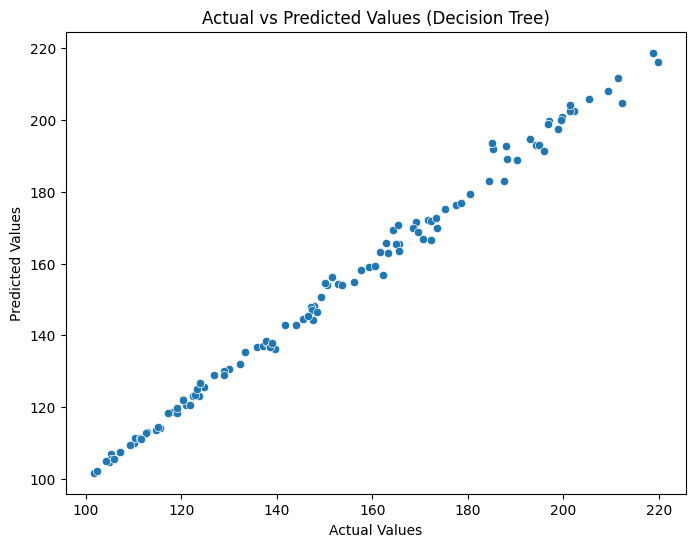

In [ ]:
# Scatter plot comparing actual and predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_dt)
plt.title('Actual vs Predicted Values (Decision Tree)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Line plot showing actual and predicted values over time (sorted)
# Create a DataFrame from y_test and y_pred_dt


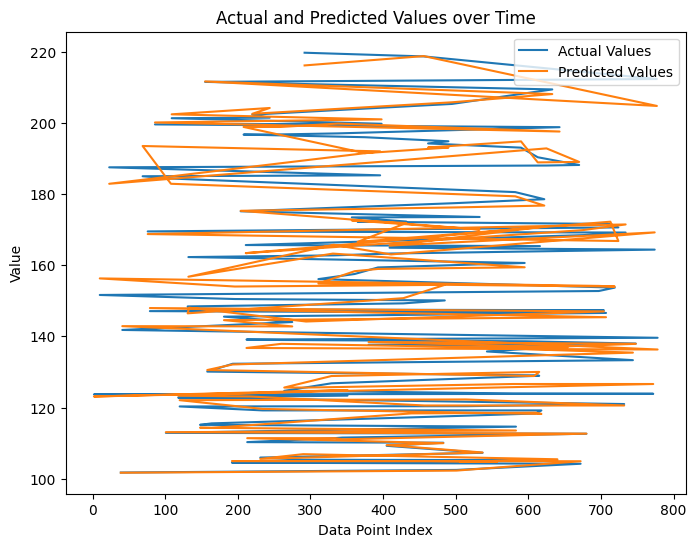

In [ ]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_dt
})

# Sort the DataFrame by the 'Actual' column
comparison_df_sorted = comparison_df.sort_values(by='Actual')

# Plot the sorted values
plt.figure(figsize=(8, 6))
plt.plot(comparison_df_sorted['Actual'], label='Actual Values')
plt.plot(comparison_df_sorted['Predicted'], label='Predicted Values')
plt.title('Actual and Predicted Values over Time')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.show()


## **3.Random Forest**

>
Random Forests are an ensemble method that combines multiple decision trees. This approach improves performance and reduces overfitting by averaging the predictions of the individual trees. Random Forests are robust and can handle a variety of data types and complexities.



In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

# Specify the categorical features in your dataset
categorical_features = ['driving_conditions', 'battery_type']

# Create a column transformer that one-hot encodes the categorical features
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the column transformer to the training and testing data
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

# Train the Random Forest model
print("Random Forest:")
random_forest_model = RandomForestRegressor(n_estimators=10)
random_forest_model.fit(X_train_transformed, y_train)
y_pred_rf = evaluate_model(random_forest_model, X_test_transformed, y_test)
print()


Random Forest:
Mean Absolute Error (MAE): 1.0967628858326575
Mean Squared Error (MSE): 2.3837981042914236
Root Mean Squared Error (RMSE): 1.543955344008182
R-squared (R²): 0.9977661181496621



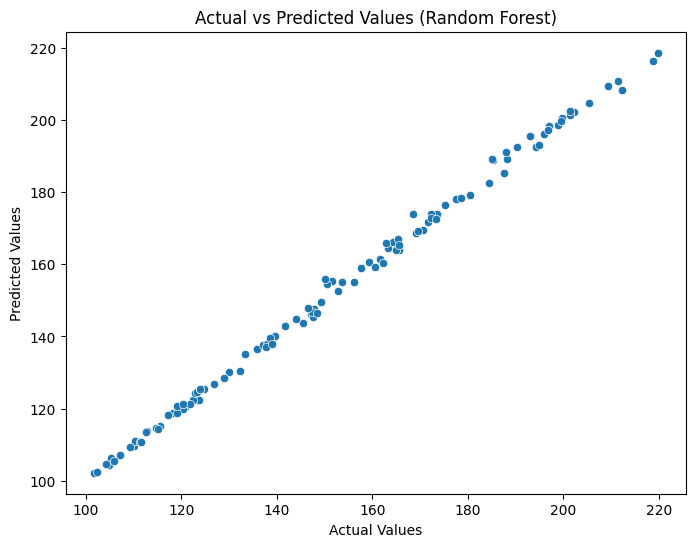

In [ ]:
def visualize_comparison(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.title('Actual vs Predicted Values (Random Forest)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()


# Call the function to visualize comparison
visualize_comparison(y_test, y_pred_rf)

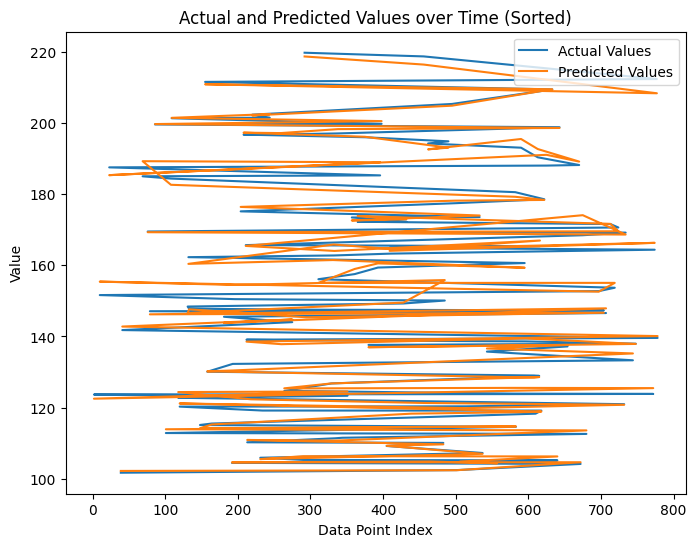

In [ ]:
 def visualize_comparison(y_test, y_pred):
  # Line plot showing actual and predicted values over time (sorted)
    comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    comparison_df_sorted = comparison_df.sort_values(by='Actual')

    plt.figure(figsize=(8, 6))
    plt.plot(comparison_df_sorted['Actual'], label='Actual Values')
    plt.plot(comparison_df_sorted['Predicted'], label='Predicted Values')
    plt.title('Actual and Predicted Values over Time (Sorted)')
    plt.xlabel('Data Point Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
visualize_comparison(y_test, y_pred_rf)


## **4.Gradient Boosting**

> Gradient Boosting is another powerful ensemble method that combines weak learners iteratively for better prediction accuracy. It builds a series of decision trees, where each tree corrects the errors made by the previous trees. This method can achieve high performance but requires careful tuning of hyperparameters.



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Specify the categorical features in your dataset
categorical_features = ['driving_conditions', 'battery_type']

# Create a column transformer that one-hot encodes the categorical features
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the column transformer to the training and testing data
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

# Train the Gradient Boosting model
print("Gradient Boosting:")
gradient_boosting_model = GradientBoostingRegressor(n_estimators=10)
gradient_boosting_model.fit(X_train_transformed, y_train)

# Predict and evaluate model performance
y_pred_gb = gradient_boosting_model.predict(X_test_transformed)

# Calculate performance metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae_gb}")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb}")
print(f"R-squared (R²): {r2_gb}")


Gradient Boosting:
Mean Absolute Error (MAE): 10.543380326455434
Mean Squared Error (MSE): 154.37835962019457
Root Mean Squared Error (RMSE): 12.424908837500361
R-squared (R²): 0.8553304430355682


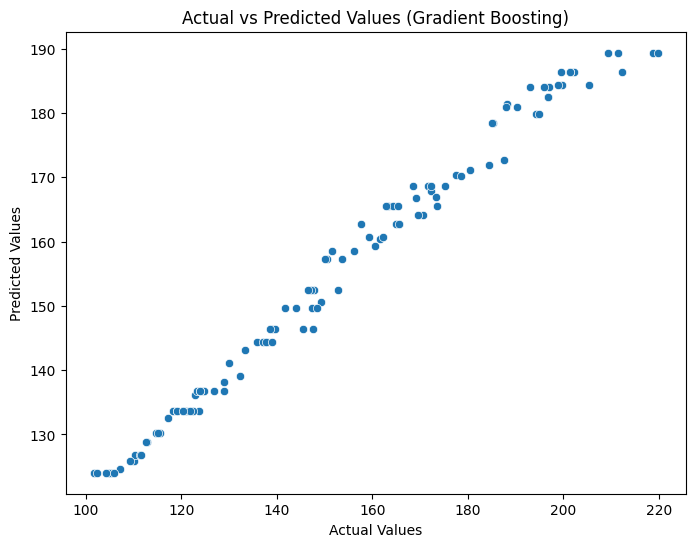

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot comparing actual and predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_gb)
plt.title('Actual vs Predicted Values (Gradient Boosting)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Line plot showing actual and predicted values over time (sorted)
# Create a DataFrame from y_test and y_pred_gb


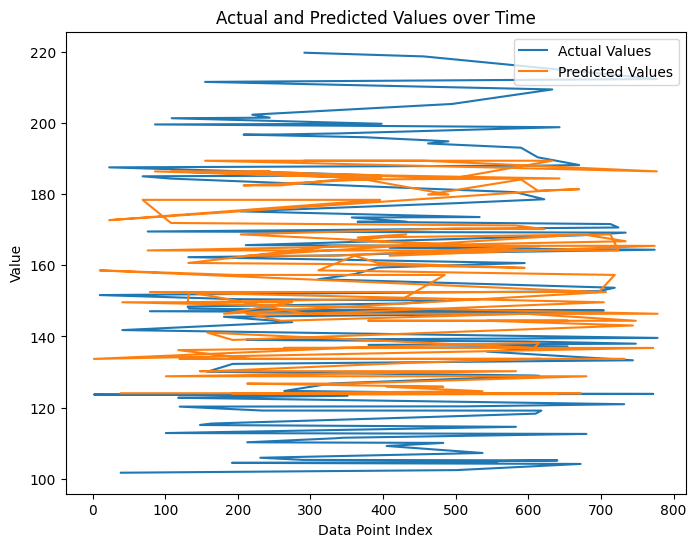

In [ ]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_gb
})

# Sort the DataFrame by the 'Actual' column
comparison_df_sorted = comparison_df.sort_values(by='Actual')

# Plot the sorted values
plt.figure(figsize=(8, 6))
plt.plot(comparison_df_sorted['Actual'], label='Actual Values')
plt.plot(comparison_df_sorted['Predicted'], label='Predicted Values')
plt.title('Actual and Predicted Values over Time')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.show()


## **5.Neural Networks**

> Neural Networks are useful for capturing complex non-linear relationships, especially with large datasets. They consist of interconnected layers of neurons that can model complex patterns in data. Training neural networks can be computationally intensive, and they may require significant hyperparameter tuning for optimal performance.



In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPRegressor

# Define categorical features in your dataset
categorical_features = ['driving_conditions', 'battery_type']

# Create a column transformer that one-hot encodes the categorical features
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Leave other columns unchanged
)

# Transform the training and testing data
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

# Train the neural network model
print("Neural Network:")
neural_network_model = MLPRegressor(max_iter=1000, learning_rate_init=0.01, solver='adam', random_state=42)
neural_network_model.fit(X_train_transformed, y_train)

# Evaluate the model
y_pred_nn = evaluate_model(neural_network_model, X_test_transformed, y_test)
print()


Neural Network:
Mean Absolute Error (MAE): 10.56955786265766
Mean Squared Error (MSE): 163.0234211865695
Root Mean Squared Error (RMSE): 12.76806254631334
R-squared (R²): 0.8472290664578235



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


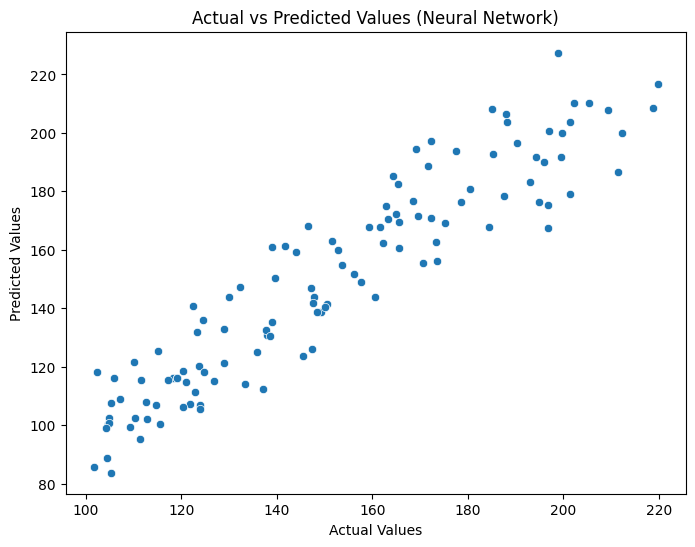

In [ ]:
# Scatter plot comparing actual and predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_nn)
plt.title('Actual vs Predicted Values (Neural Network)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


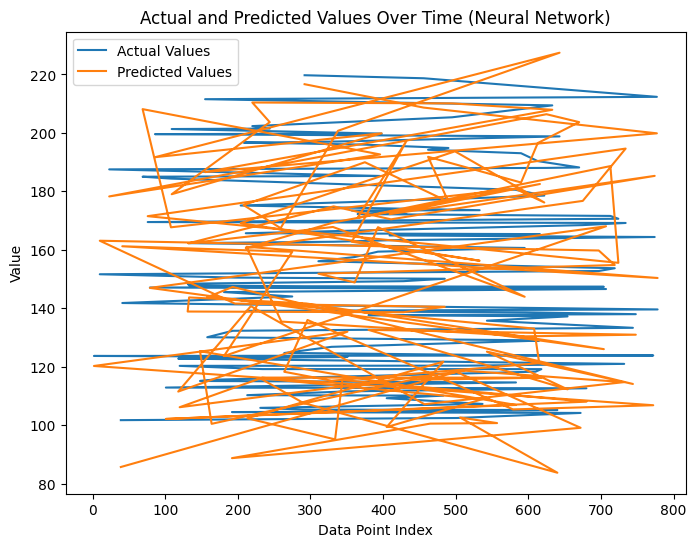

In [ ]:
# Sort the data by the actual values
sorted_indices = y_test.argsort()
sorted_y_test = y_test.iloc[sorted_indices]
sorted_y_pred_nn = pd.Series(y_pred_nn).iloc[sorted_indices]

# Line plot showing actual and predicted values over time (sorted)
plt.figure(figsize=(8, 6))
plt.plot(sorted_y_test.index, sorted_y_test.values, label='Actual Values')
plt.plot(sorted_y_test.index, sorted_y_pred_nn.values, label='Predicted Values')
plt.title('Actual and Predicted Values Over Time (Neural Network)')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.show()


## **6.Support vector machine**

> Support Vector Machines (SVM) can be effective for complex datasets and non-linear relationships. The model works by finding a hyperplane that best separates data points into different classes (for classification tasks) or regression lines (for regression tasks). SVMs can handle high-dimensional data and have several kernel options to manage non-linearity.



In [ ]:
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define the categorical features
categorical_features = ['driving_conditions', 'battery_type']

# Create a column transformer that one-hot encodes the categorical features
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the column transformer to the training and testing data
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train_transformed)
X_test_transformed = scaler.transform(X_test_transformed)

# Train the Support Vector Machine model
print("Support Vector Machine:")
svr_model = SVR()
svr_model.fit(X_train_transformed, y_train)
y_pred_svr = evaluate_model(svr_model, X_test_transformed, y_test)

print()  # Blank line for separation


Support Vector Machine:
Mean Absolute Error (MAE): 20.367331759502477
Mean Squared Error (MSE): 569.7108271337014
Root Mean Squared Error (RMSE): 23.86861594507946
R-squared (R²): 0.4661180934812117



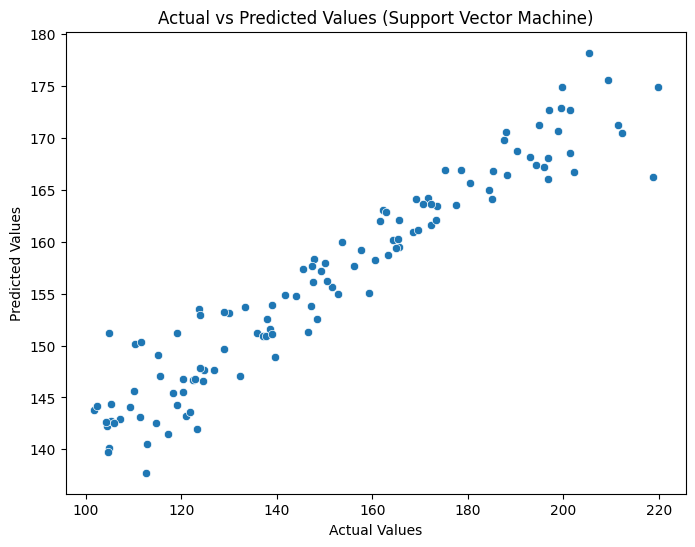

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot comparing actual and predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_svr)
plt.title('Actual vs Predicted Values (Support Vector Machine)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


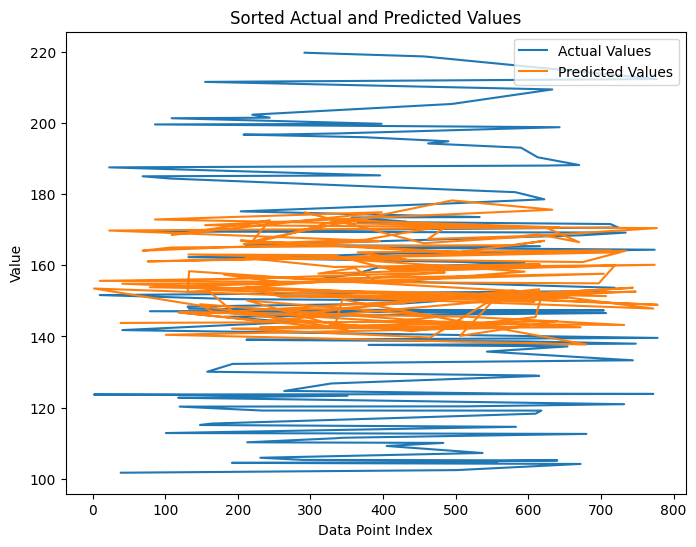

In [ ]:
# Combine y_test and y_pred_svr into a DataFrame for sorting and plotting
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_svr
})

# Sort the DataFrame by 'Actual' values
comparison_df_sorted = comparison_df.sort_values(by='Actual')

# Plot the sorted actual and predicted values
plt.figure(figsize=(8, 6))
plt.plot(comparison_df_sorted['Actual'], label='Actual Values')
plt.plot(comparison_df_sorted['Predicted'], label='Predicted Values')
plt.title('Sorted Actual and Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.show()
